# Práctica 6: Clasificadores de Distancia y Bayesianos

## Integrantes:
- **López Jiménez Angello Michael**
- **Sandoval Garibay Salvador**

### 1. Selecciona un dataset y realiza el pre-procesamiento que consideres conveniente.

**Información sobre el dataset seleccionado:** El conjunto de datos Iris se utilizó en el clásico artículo de R. A. Fisher de 1936, «The Use of Multiple Measurements in Taxonomic Problems» (El uso de mediciones múltiples en problemas taxonómicos), y también se puede encontrar en el repositorio de aprendizaje automático de la UCI.

Incluye tres especies de iris (Iris setosa, Iris versicolor e Iris virginica) con 50 muestras cada una, así como algunas propiedades sobre cada flor. 

https://www.kaggle.com/datasets/uciml/iris?resource=download

Elección de el dataset:
- Las tres especies de iris forman grupos bien diferenciados en sus características (largo y ancho del sépalo y pétalo).
- Es manejable debido a sus 150 muestras, sobre todo para ejecutar Leave-One-Out en el notebook desarrollado.
- Cada clase tiene exactamente 50 muestras, lo que evita sesgos hacia clases mayoritarias.
- No requiere preprocesamiento complejo ni limpieza adicional, como se mostrará adelante, ya que no tiene sobre todo valores nulos.
- Si se ingresa a la página https://www.kaggle.com/datasets/uciml/iris?resource=download, se notará, además de la cantidad de descargas, que al ser por lo mismo ligero, lo hace empleable para este caso práctico.

#### > Celda 1 – Importamos librerías y cargamos el dataset

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


En esta celda importamos pandas y numpy, que usaremos para manejar datos. Luego cargamos el archivo **Iris.csv** en un DataFrame llamado df y mostramos las primeras filas para confirmar que se leyó correctamente.

#### > Celda 2 – Exploración básica del dataset

In [9]:
# Dimensiones del dataset (filas, columnas)
print("Dimensiones del dataset:", df.shape)
# Información de tipos de datos y nulos
print("\nInformación del dataset:")
print(df.info())
# Estadísticos descriptivos de las columnas numéricas
print("\nDescripción estadística de las características numéricas:")
print(df.describe())
# Conteo de muestras por especie
print("\nNúmero de muestras por especie:")
print(df["Species"].value_counts())

Dimensiones del dataset: (150, 6)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Descripción estadística de las características numéricas:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1

#### > Celda 3 – Verificamos valores faltantes

In [10]:
print("\nValores nulos por columna:\n", df.isnull().sum())


Valores nulos por columna:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Aquí revisamos si hay valores nulos en alguna columna. En este caso hay 0, pero sii hubiera nulos, tendríamos que decidir si los llenamos o eliminamos filas, pero aquí no será necesario.

#### > Celda 4 – Eliminamos columnas innecesarias y separamos características / etiquetas

In [11]:
# Eliminamos la columna Id porque solo es un identificador y no ayuda a clasificar
df = df.drop(columns=["Id"])
# Definimos X como las columnas numéricas
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
# Definimos y como la columna objetivo (Species)
y = df["Species"]
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
# Mostramos las primeras filas de X y y
print("\nPrimeras filas de X:")
print(X.head())

print("\nPrimeras etiquetas (y):")
print(y.head())

Forma de X: (150, 4)
Forma de y: (150,)

Primeras filas de X:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

Primeras etiquetas (y):
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


En este punto, quiaremos la columna **Id** porque no contiene información útil para el modelo. Y además, separamos el dataset en:
- X → matriz de características (las 4 medidas en cm).
- y → vector de etiquetas (la especie de cada flor).

Ya que esto es lo que usarán los modelos de clasificación.

#### > Celda 5 – Codificamos la variable objetivo de Species → números

In [13]:
from sklearn.preprocessing import LabelEncoder
# Creamos el codificador
label_encoder = LabelEncoder()
# Ajustamos y transformamos y
y_encoded = label_encoder.fit_transform(y)
# Mostramos algunas etiquetas originales y codificadas
print("Clases originales:", list(label_encoder.classes_))
print("Ejemplo de y (texto):")
print(y.head().values)
print("\nEjemplo de y_encoded (numérico):")
print(y_encoded[:5])

Clases originales: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Ejemplo de y (texto):
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']

Ejemplo de y_encoded (numérico):
[0 0 0 0 0]


Los modelos de scikit-learn funcionan mejor si las etiquetas son números. Con LabelEncoder transformamos:
- Iris-setosa, Iris-versicolor, Iris-virginica

#### > Celda 6 – Se realiza el escalado de las características

In [14]:
from sklearn.preprocessing import StandardScaler
# Creamos el escalador
scaler = StandardScaler()
# Ajustamos el escalador a X y transformamos
X_scaled = scaler.fit_transform(X)
# Convertimos de nuevo a DataFrame solo para visualizarlo de mejor manera
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Primeras filas de X escalado:")
print(X_scaled_df.head())

Primeras filas de X escalado:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.900681      1.032057      -1.341272     -1.312977
1      -1.143017     -0.124958      -1.341272     -1.312977
2      -1.385353      0.337848      -1.398138     -1.312977
3      -1.506521      0.106445      -1.284407     -1.312977
4      -1.021849      1.263460      -1.341272     -1.312977


Debido a que KNN y 1NN se basan en distancias entre puntos. Si una característica tiene un rango mucho más grande que otra, domina la distancia.
Para evitar eso usamos StandardScaler, que transforma cada columna a:
- media ≈ 0
- desviación estándar ≈ 1

Guardamos el resultado en X_scaled (versión numérica) y X_scaled_df (versión DataFrame para vizualizarlo únicamente).

### 2. Aplica los siguientes modelos de clasificación. 

- 1NN
- KNN con K={3,5,7 y 9}
- Naive Bayes.

#### > Celda 1 – Definimos los modelos de clasificación

In [15]:
from sklearn.neighbors import KNeighborsClassifier   # Para 1NN y KNN
from sklearn.naive_bayes import GaussianNB           # Para Naive Bayes

# Creamos un diccionario con todos los modelos
modelos = {
    "1-NN": KNeighborsClassifier(n_neighbors=1),   # Vecino más cercano
    "KNN-3": KNeighborsClassifier(n_neighbors=3),  # k = 3
    "KNN-5": KNeighborsClassifier(n_neighbors=5),  # k = 5
    "KNN-7": KNeighborsClassifier(n_neighbors=7),  # k = 7
    "KNN-9": KNeighborsClassifier(n_neighbors=9),  # k = 9
    "Naive Bayes": GaussianNB()                    # Naive Bayes Gaussiano
}

# Solo para verificar que el diccionario se creó bien
modelos

{'1-NN': KNeighborsClassifier(n_neighbors=1),
 'KNN-3': KNeighborsClassifier(n_neighbors=3),
 'KNN-5': KNeighborsClassifier(),
 'KNN-7': KNeighborsClassifier(n_neighbors=7),
 'KNN-9': KNeighborsClassifier(n_neighbors=9),
 'Naive Bayes': GaussianNB()}

**from sklearn.neighbors import KNeighborsClassifier**, importa la clase que implementa el algoritmo k-Nearest Neighbors (KNN). Con esto creamos tanto el 1-NN como los KNN con k = 3,5,7,9.

**from sklearn.naive_bayes import GaussianNB**, importa el clasificador Naive Bayes Gaussiano, que asume que las características siguen una distribución normal.

**modelos = { ... }**, es el diccionario donde la *llave* es el nombre del modelo (cadena de texto que luego imprimiremos), y el *valor* es el objeto del modelo ya configurado (KNeighborsClassifier(...) o GaussianNB()).

### 3. Con los métodos de validación:

- Hold-Out 70/30.
- 10-Fold Cross-Validation.
- Leave-One-Out.

#### > Celda 1 – Hold-Out 70/30

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividimos los datos en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,          # Características ya escaladas
    y_encoded,         # Etiquetas numéricas
    test_size=0.3,     # 30% para prueba
    random_state=42,   # Semilla para reproducibilidad
    stratify=y_encoded # Mantiene balance de clases en train y test
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

print("\n=== Resultados Hold-Out 70/30 ===")
for nombre, modelo in modelos.items():
    # 1. Entrenamos el modelo con el conjunto de entrenamiento
    modelo.fit(X_train, y_train)
    
    # 2. Predecimos las etiquetas del conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # 3. Calculamos la exactitud (accuracy)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"{nombre}: Accuracy = {acc:.4f}")

Tamaño del conjunto de entrenamiento: 105
Tamaño del conjunto de prueba: 45

=== Resultados Hold-Out 70/30 ===
1-NN: Accuracy = 0.9333
KNN-3: Accuracy = 0.9111
KNN-5: Accuracy = 0.9111
KNN-7: Accuracy = 0.9333
KNN-9: Accuracy = 0.9556
Naive Bayes: Accuracy = 0.9111


Usamos train_test_split para dividir los datos:
- **X_train, y_train** se usan para entrenar el modelo (70%).
- **X_test, y_test** se usan para evaluar el modelo (30%).

**stratify=y_encoded** hace que las tres clases (las especies) queden balanceadas tanto en entrenamiento como en prueba.

Y, para cada modelo en modelos:
- **fit(X_train, y_train)** el modelo aprende a partir de los datos de entrenamiento.
- **predict(X_test)** el modelo predice la clase de las muestras de prueba.
- **accuracy_score** calcula el porcentaje de aciertos del modelo.

#### > Celda 2 – 10-Fold Cross-Validation

In [20]:
from sklearn.model_selection import KFold, cross_val_score

# Definimos el esquema de validación cruzada con 10 particiones (folds)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

print("=== Resultados 10-Fold Cross-Validation ===")
for nombre, modelo in modelos.items():
    # cross_val_score entrena y evalúa el modelo en cada uno de los 10 folds
    scores = cross_val_score(modelo, X_scaled, y_encoded, cv=kfold)
    
    print(f"{nombre}: Accuracy promedio = {scores.mean():.4f}  |  Desviación estándar = {scores.std():.4f}")

=== Resultados 10-Fold Cross-Validation ===
1-NN: Accuracy promedio = 0.9533  |  Desviación estándar = 0.0600
KNN-3: Accuracy promedio = 0.9600  |  Desviación estándar = 0.0611
KNN-5: Accuracy promedio = 0.9533  |  Desviación estándar = 0.0670
KNN-7: Accuracy promedio = 0.9533  |  Desviación estándar = 0.0670
KNN-9: Accuracy promedio = 0.9533  |  Desviación estándar = 0.0670
Naive Bayes: Accuracy promedio = 0.9600  |  Desviación estándar = 0.0533


Aquí, usamos validación cruzada 10-Fold, que es más robusta que Hold-Out, **KFold(n_splits=10)** divide el dataset en 10 partes (folds). Donde en cada iteración: 9 partes se usan para entrenar y 1 parte se usa para probar.

**cross_val_score** hace ese proceso automático de entrenar y probar. Y, devuelve un arreglo **scores** con 10 valores de accuracy, uno por cada fold.

Al final mostramos, **scores.mean()** que es el accuracy promedio del modelo y **scores.std()** qué indica la variación de resultados entre los folds.

#### > Celda 3 – Leave-One-Out

In [21]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

print("=== Resultados Leave-One-Out ===")
for nombre, modelo in modelos.items():
    # Leave-One-Out hace tantas iteraciones como muestras (150 en este dataset)
    scores = cross_val_score(modelo, X_scaled, y_encoded, cv=loo)
    
    print(f"{nombre}: Accuracy = {scores.mean():.4f}")

=== Resultados Leave-One-Out ===
1-NN: Accuracy = 0.9467
KNN-3: Accuracy = 0.9467
KNN-5: Accuracy = 0.9467
KNN-7: Accuracy = 0.9600
KNN-9: Accuracy = 0.9533
Naive Bayes: Accuracy = 0.9533


Aquí, cada iteración toma 1 sola muestra como conjunto de prueba, y usa las otras 149 muestras como conjunto de entrenamiento. *Esto se repite 150 veces, es decir, uno por cada fila.*

**cross_val_score** hace el ciclo de entrenamiento y prueba. Regresa un arreglo a **scores** con 150 valores de accurracy, uno por cada iteración.

**scores.mean()** es la accuracy promedio del modelo bajo el esquema más exigente de validación.

**NOTA: El random_state=42 es un número fijo que utilizan comunmente en documentación y temas de pruebas para obtener simpre la misma salida o resultado. Sin embargo el número real fijo puede ser cualquiera: 0, 15, 3…**. Por tanto, podemos cambiarlo, pero su elección se baso en el uso común, sin un sentido teórico. 

### Resultados Finales

#### > Celda 1 - Tabla resumen de TODOS los resultados

In [23]:
import pandas as pd

modelos_lista = ["1-NN", "KNN-3", "KNN-5", "KNN-7", "KNN-9", "Naive Bayes"]

resumen = {
    "Modelo": modelos_lista,
    "HoldOut_70_30": [0.9333, 0.9111, 0.9111, 0.9333, 0.9556, 0.9111],
    "CV_10Fold":     [0.9533, 0.9600, 0.9533, 0.9533, 0.9533, 0.9600],
    "LOO":           [0.9467, 0.9467, 0.9467, 0.9600, 0.9533, 0.9533]
}

df_resumen = pd.DataFrame(resumen)
df_resumen


,Modelo,HoldOut_70_30,CV_10Fold,LOO
0,1-NN,0.9333,0.9533,0.9467
1,KNN-3,0.9111,0.9600,0.9467
2,KNN-5,0.9111,0.9533,0.9467
3,KNN-7,0.9333,0.9533,0.9600
4,KNN-9,0.9556,0.9533,0.9533
5,Naive Bayes,0.9111,0.9600,0.9533


Aquí solo usamos los valores con los accuracies ya calculados anteriormente, con esto visualizamos las variaciones entre ellos.

#### > Celda 2 - Gráfico comparativo

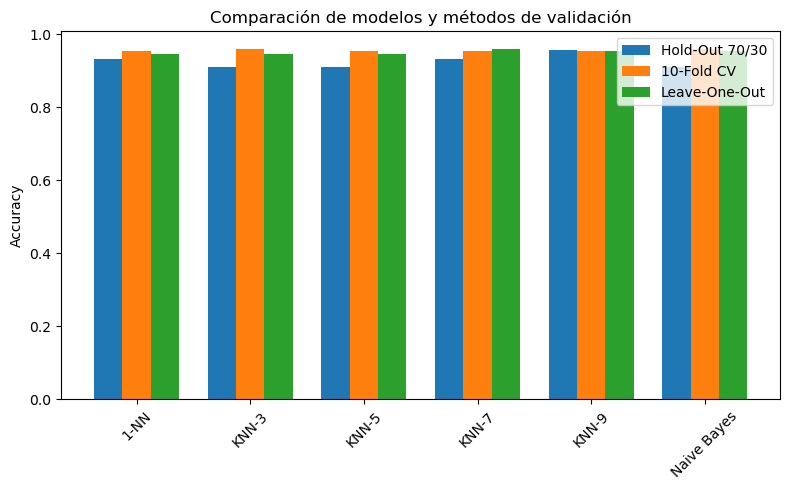

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Posiciones en el eje X
x = np.arange(len(modelos_lista))
ancho = 0.25  # ancho de cada barra

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - ancho, df_resumen["HoldOut_70_30"], width=ancho, label="Hold-Out 70/30")
ax.bar(x,           df_resumen["CV_10Fold"],    width=ancho, label="10-Fold CV")
ax.bar(x + ancho, df_resumen["LOO"],           width=ancho, label="Leave-One-Out")

ax.set_xticks(x)
ax.set_xticklabels(modelos_lista, rotation=45)
ax.set_ylabel("Accuracy")
ax.set_title("Comparación de modelos y métodos de validación")
ax.legend()
plt.tight_layout()
plt.show()

Los modelos 1NN, KNN y Naive Bayes son algoritmos de clasificación que aprenden a partir de los datos para predecir la clase de nuevas muestras. En este trabajo se utilizó el dataset Iris. Este dataset contiene 150 muestras de flores de tres especies distintas (Iris setosa, Iris versicolor e Iris virginica), con cuatro características numéricas que describen medidas del sépalo y del pétalo.

Los métodos de validación aplicados *Hold-Out 70/30, 10-Fold Cross-Validation y Leave-One-Out*, empleados. No son modelos, sino formas de evaluar el rendimiento real de los modelos de clasificación. Mientras los modelos producen predicciones, los métodos de validación producen métricas de desempeño, como la exactitud (accuracy), que indican qué tan bien generaliza cada modelo a datos nuevos.

El dataset Iris se utilizó específicamente para:
- Entrenar los modelos 1NN, KNN y Naive Bayes.
- Evaluar su desempeño bajo diferentes esquemas de validación.
- Comparar cómo afecta la cantidad de datos de entrenamiento y el número de particiones en el rendimiento de los clasificadores.
- Analizar qué modelo se adapta mejor a este problema de clasificación.

Al aplicar los métodos de validación, se pudo observar que todos los modelos obtuvieron accuracies altas, debido a la buena separabilidad de las clases en este dataset. Sin embargo, las evaluaciones también permitieron identificar diferencias importantes: KNN con valores intermedios de k y Naive Bayes obtuvieron los mejores resultados de manera consistente en los esquemas más robustos (10-Fold y Leave-One-Out), mientras que 1NN fue más sensible a la variación en los datos.

*Con esto valores de accuracy obtenidos (entre 91% y 96%) indican que los modelos fueron capaces de aprender correctamente los patrones presentes en el dataset Iris. Esto significa que, al recibir nuevas muestras, los clasificadores lograron predecir la especie adecuada en la mayoría de los casos.*